In [2]:
# Allow display of images
from IPython.display import display, Image

# Import the required modules
import numpy as np
import matplotlib.pyplot as plt
import glob

import pandas as pd
import seaborn as sns
from scipy import fftpack
import scipy as sp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import LinearLocator

# Tools from brainsignal library
import os
import sys
path=r'C:\Users\Hamon\Documents\Stage\brainsignal'
sys.path.append(path)
import brainsignal.datageneration as dg
import brainsignal.datanalysis as da
import brainsignal.HRVanalysis as ha
import brainsignal.bodediagram as bd
import brainsignal.transferfunction as tf

# This makes the plots appear inside the notebook
%matplotlib inline

### Data loading

In [3]:
rep='../../data/'
patientdir='ID_2'

file=glob.glob(rep+patientdir+'/WAVE_ABP.txt', recursive=True)[0]

data=pd.read_csv(file,header=None, decimal=',', delimiter='\n')
data_array=np.array(data.values)
ABP_signal=data_array.transpose()[0]

In [4]:
fs=200 #Hz
ABP_time=np.arange(len(ABP_signal))/fs

In [5]:
len(ABP_time)

17726400

In [6]:
file=glob.glob(rep+patientdir+'/WAVE_ICP.txt', recursive=True)[0]

data=pd.read_csv(file,header=None, decimal=',', delimiter='\n')
data_array=np.array(data.values)
ICP_signal=data_array.transpose()[0]

In [7]:
fs=200
ICP_time=np.arange(len(ICP_signal))/fs

In [8]:
len(ICP_time)

17726400

### Visualization 

Text(0.5, 0, 'time(h)')

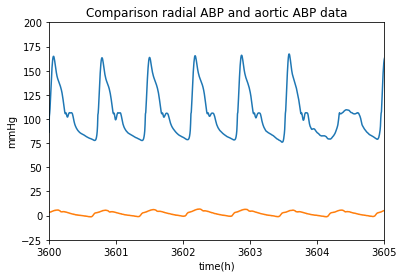

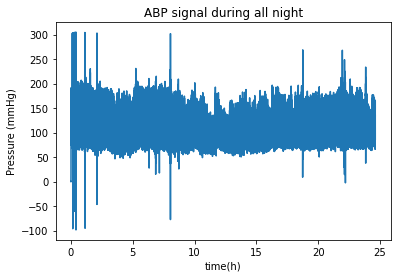

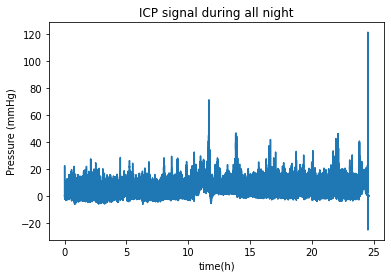

In [9]:
# 5 seconds time scale
time=1 #beginning of the visualisation window in hour

plt.plot(ABP_time,ABP_signal)
plt.plot(ICP_time,ICP_signal)

plt.title('Comparison radial ABP and aortic ABP data')
plt.ylabel('mmHg')
plt.xlabel('time(h)')

plt.xlim([time*60*60,time*60*60+5])
plt.ylim([-25,200])

plt.figure()
plt.plot(ABP_time/3600,ABP_signal)
plt.title('ABP signal during all night')
plt.ylabel('Pressure (mmHg)')
plt.xlabel('time(h)')

plt.figure()
plt.plot(ICP_time/3600,ICP_signal)
plt.title('ICP signal during all night')
plt.ylabel('Pressure (mmHg)')
plt.xlabel('time(h)')

# System identification

Method using the cross power spectral density, Pxy, using Welch’s method

In [10]:
freq_cross,mag_cross,phas_cross,time_cross =tf.tf_crosspower(ABP_signal, ICP_signal, size_window=300, times=ABP_time)

Method using fft with windowing.

In [44]:
freq_fft,mag_fft, phase_fft,time_fft=tf.tf_fft(ABP_signal, ICP_signal,ABP_time,300, window=sp.signal.windows.hann)

## Gain 

### Cross PSD method

Text(0.5, 1.0, 'Color-scaled gain of TF identified ')

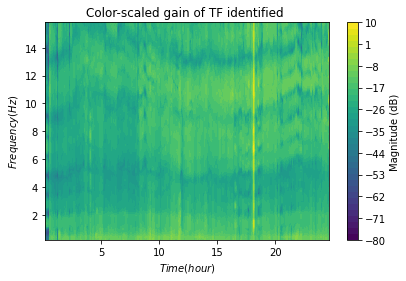

In [30]:
indices=da.indexseq(0,16,freq_cross)

fig=plt.figure(figsize=[14,4])
ax = fig.add_subplot(122)
cf = ax.contourf(time_cross,freq_cross[indices],mag_cross[indices,:],40,cmap='viridis')
cbar = fig.colorbar(cf, label='Magnitude (dB)')
cbar.locator = LinearLocator(numticks=11)
cbar.update_ticks()

ax.set_xlabel(r'$Time (hour)$')
ax.set_ylabel(r'$Frequency (Hz)$')
ax.set_aspect('auto')
plt.title('Color-scaled gain of TF identified ')

Text(0.5, 1.0, 'Color-scaled gain of TF identified ')

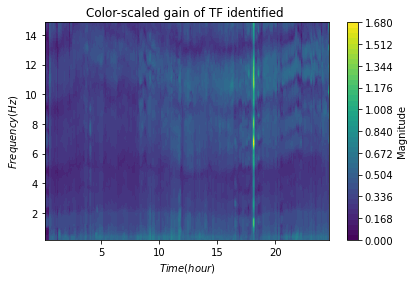

In [39]:
#without log 
indices=da.indexseq(0,15,freq_cross)

fig=plt.figure(figsize=[14,4])
ax = fig.add_subplot(122)
cf = ax.contourf(time_cross,freq_cross[indices],np.exp(mag_cross[indices,:]/20),40,cmap='viridis')
cbar = fig.colorbar(cf, label='Magnitude')
cbar.locator = LinearLocator(numticks=11)
cbar.update_ticks()

ax.set_xlabel(r'$Time (hour)$')
ax.set_ylabel(r'$Frequency (Hz)$')
ax.set_aspect('auto')
plt.title('Color-scaled gain of TF identified ')

In [40]:
it=np.where(np.array(time_cross)>=9)[0][0]

In [41]:
it

107

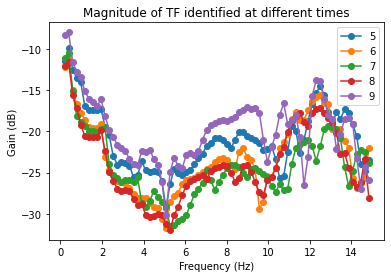

In [42]:
for h in range(5,10):
    it=np.where(np.array(time_cross)>=h)[0][0]
    plt.plot(freq_cross[indices],mag_cross[indices,it],'-o', label=h)
    plt.title('Magnitude of TF identified at different times')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Gain (dB)')
    plt.legend()

### FFT method

Text(0.5, 1.0, 'Color-scaled gain of TF identified ')

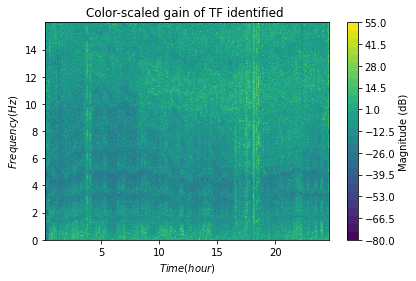

In [45]:
indices=da.indexseq(0,16,freq_fft)

fig=plt.figure(figsize=[14,4])
ax = fig.add_subplot(122)
cf = ax.contourf(time_fft,freq_fft[indices],mag_fft[indices,:],30,cmap='viridis')
cbar = fig.colorbar(cf, label='Magnitude (dB)')
cbar.locator = LinearLocator(numticks=11)
cbar.update_ticks()

ax.set_xlabel(r'$Time (hour)$')
ax.set_ylabel(r'$Frequency (Hz)$')
ax.set_aspect('auto')
plt.title('Color-scaled gain of TF identified ')

Text(0.5, 1.0, 'Color-scaled gain of TF identified ')

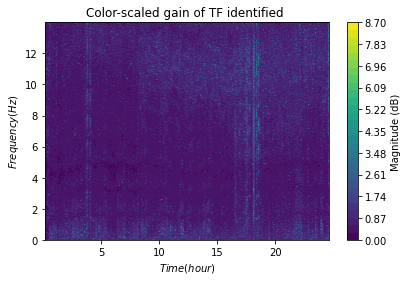

In [47]:
# without log 
indices=da.indexseq(0,14,freq_fft)

fig=plt.figure(figsize=[14,4])
ax = fig.add_subplot(122)
cf = ax.contourf(time_fft,freq_fft[indices],np.exp(mag_fft[indices,:]/20),30,cmap='viridis')
cbar = fig.colorbar(cf, label='Magnitude (dB)')
cbar.locator = LinearLocator(numticks=11)
cbar.update_ticks()

ax.set_xlabel(r'$Time (hour)$')
ax.set_ylabel(r'$Frequency (Hz)$')
ax.set_aspect('auto')
plt.title('Color-scaled gain of TF identified ')

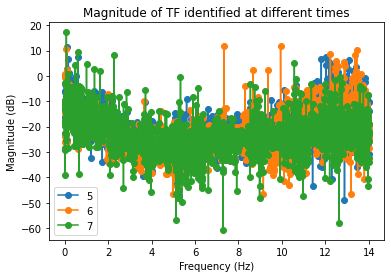

In [50]:
for h in range(5,8):
    it=np.where(np.array(time_fft)>=h)[0][0]
    plt.plot(freq_fft[indices],mag_fft[indices,it],'-o', label=h)
    plt.title('Magnitude of TF identified at different times')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude (dB)')
    plt.legend()

## Phase

### Cross power method

Text(0.5, 1.0, 'Color-scaled phase of TF identified')

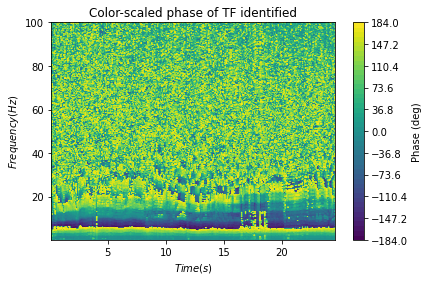

In [46]:
fig=plt.figure(figsize=[14,4])
ax = fig.add_subplot(122)
cf = ax.contourf(time_fft,freq_cross,phas_cross,51,cmap='viridis')
cbar = fig.colorbar(cf, label='Phase (deg)')
cbar.locator = LinearLocator(numticks=11)
cbar.update_ticks()

ax.set_xlabel(r'$Time (s)$')
ax.set_ylabel(r'$Frequency (Hz)$')
ax.set_aspect('auto')
plt.title('Color-scaled phase of TF identified')

### FFT method